In [48]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append("C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts")
from UMAP import *
from utils import *

In [80]:
data = loadmatInPy('C:/Users/Nishant Joshi/Google Drive/Analyzed/xuan_16-7-19_E2_analyzed.mat')


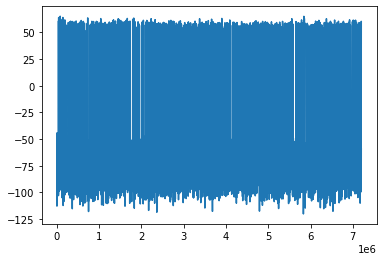

In [82]:
plt.plot(data[0]['membrane_potential'])

In [13]:
data_acsf_all_conds = pickle.load(open('D:/Cluster Feature files/all_acsf_ephys.p','rb'))
data_acsf_all_conds_new = pickle.load(open('D:/Cluster Feature files/all_acsf_ephys_all_conds.p','rb'))
data_acsf_NC = pickle.load(open('D:/Cluster Feature files/all_acsf_ephys_NC.p','rb'))


ind_feat = [0,3,4,6,9,17,20]

features = ['Vm_avg','dvdt_p','dvdt_n','resistance','thr','adaptation',
    'isi','peak','peak_adaptation','ap_width','hyp_value','fist_spike','up_down_ratio',
    'isi_adaptation','thr_adp_ind','psth','int_fr','fr','sub_thr','spk_fr_adp','imp']

data_acsf_exc_all_conds = remove_nans_and_infs(np.squeeze(data_acsf_all_conds['exc_acsf'])) 
data_acsf_inh_all_conds = remove_nans_and_infs(np.squeeze(data_acsf_all_conds['inh_acsf']))

# data_acsf_exc_all_conds = data_acsf_all_conds['exc_acsf'] 
# data_acsf_inh_all_conds = data_acsf_all_conds['inh_acsf']
df_exc = pd.DataFrame(data =data_acsf_exc_all_conds,columns = features )
df_inh = pd.DataFrame(data =data_acsf_inh_all_conds,columns = features ) 

df_all_conds = pd.DataFrame(np.concatenate((np.squeeze(data_acsf_exc_all_conds),np.squeeze(data_acsf_inh_all_conds))),columns=features)
df_all_conds['labels'] = np.concatenate((np.repeat('exc',len(data_acsf_exc_all_conds)),np.repeat('inh',len(data_acsf_inh_all_conds))))


In [32]:
df_exc_old = pd.DataFrame(data=np.squeeze(data_acsf_all_conds['exc_acsf']),columns=features)
df_exc_old['exp_name'] = data_acsf_all_conds_new['exp_exc']
df_inh_old = pd.DataFrame(data=np.squeeze(data_acsf_all_conds['inh_acsf']),columns=features)
df_inh_old['exp_name'] = data_acsf_all_conds_new['exp_inh']
with pd.option_context('mode.use_inf_as_na', True):
    df_inh_old = df_inh_old.dropna()
    df_exc_old = df_exc_old.dropna() 


Initial test for clustering 

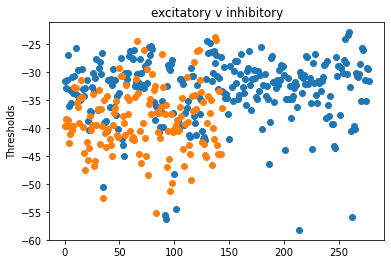

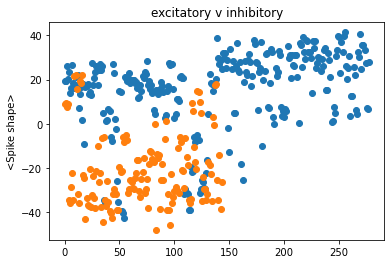

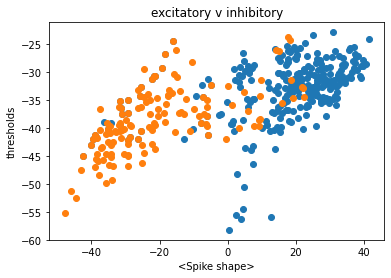

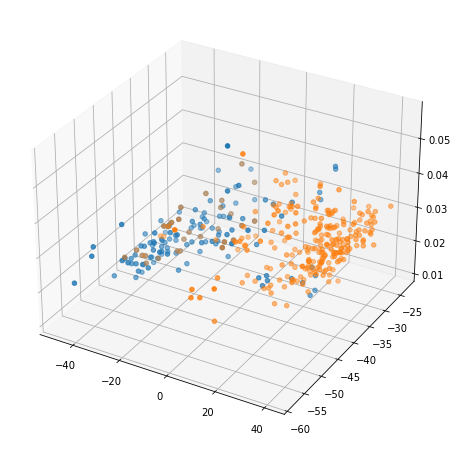

In [33]:
#basic test for clsutering 

plt.scatter(np.arange(len(df_exc_old['thr'])),df_exc_old['thr'])
plt.scatter(np.arange(len(df_inh_old['thr'])),df_inh_old['thr'])
plt.ylabel('Thresholds')
plt.title('excitatory v inhibitory')
plt.show()

plt.scatter(np.arange(len(df_exc_old['Vm_avg'])),df_exc_old['Vm_avg'])
plt.scatter(np.arange(len(df_inh_old['Vm_avg'])),df_inh_old['Vm_avg'])
plt.ylabel('<Spike shape>')
plt.title('excitatory v inhibitory')

plt.show()
plt.scatter(df_exc_old['Vm_avg'],df_exc_old['thr'])
plt.scatter(df_inh_old['Vm_avg'],df_inh_old['thr'])
plt.xlabel('<Spike shape>')
plt.ylabel('thresholds')
plt.title('excitatory v inhibitory')
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')
ax.scatter(df_inh_old['Vm_avg'],df_inh_old['thr'],df_inh_old['imp'])
ax.scatter(df_exc_old['Vm_avg'],df_exc_old['thr'],df_exc_old['imp'])
plt.show()

In [14]:
df_exc[df_exc.columns[ind_feat]]

,Vm_avg,resistance,thr,isi,sub_thr,imp
0,19.422547,-1.689717,-31.621822,40208.778409,-71.439135,0.018043
1,19.575796,-2.727707,-32.975678,16505.668981,-73.811706,0.019335
2,26.219333,1.995472,-31.495817,55455.103175,-74.201296,0.015327
3,20.177337,2.903311,-27.023575,42075.688235,-75.873648,0.023991
4,23.400372,0.431106,-36.090445,34354.265700,-72.578996,0.013927
...,...,...,...,...,...,...
273,33.432575,-1.455024,-31.452269,24482.914089,-68.317916,0.026529
274,27.356348,-1.193170,-35.255289,105544.140625,-71.751094,0.022374
275,7.205288,1.688254,-29.369599,7404.953656,-74.505517,0.029983
276,6.586392,1.380375,-29.580066,7329.540265,-73.693106,0.030084


5 0.0


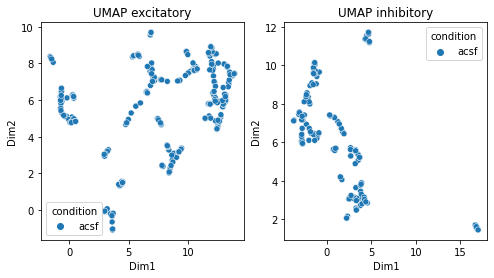

10 0.0


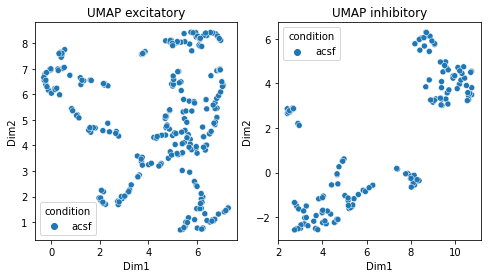

15 0.0


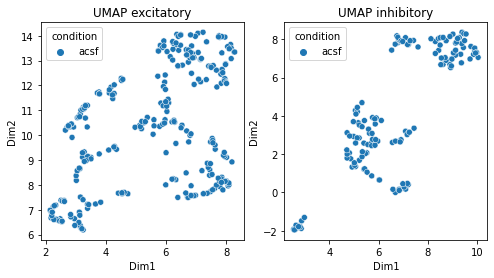

20 0.0


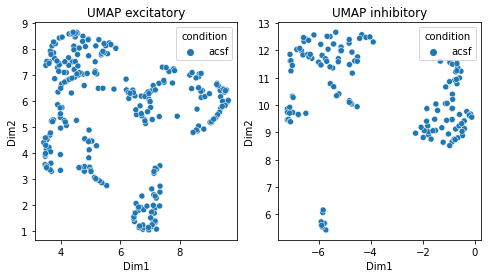

25 0.0


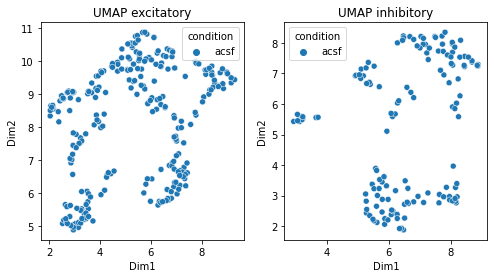

30 0.0


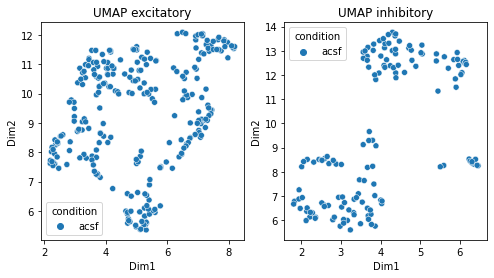

35 0.0


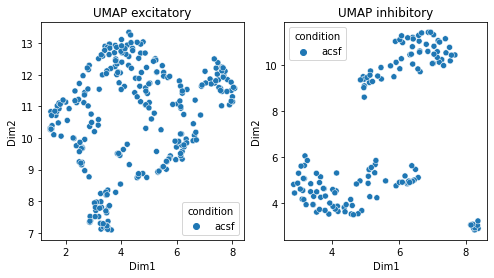

In [34]:
# data_exc = data_acsf_exc_all_conds
# data_inh = data_acsf_inh_all_conds

# df_exc = pd.DataFrame(data_exc,columns=features)
# df_inh = pd.DataFrame(data_inh,columns=features)

ind_feat = [0,3,4,6,18,20]

neighbours  = np.arange(5,40,5)
# distances = np.arange(0.05,0.5,0.05)
distances = [0.0]
for n in neighbours:
    for dist in distances:
        print(n, dist)
        plot_UMAP(df_inh_old[df_inh_old.columns[ind_feat]],
                  df_exc_old[df_exc_old.columns[ind_feat]],
                  'blue','blue',n,dist,np.repeat(['acsf'],len(df_inh_old)),np.repeat(['acsf'],len(df_exc_old)),
                  figsize=[8,4],
                  random_state=42)
                #   'blue','blue',n,dist,labels_inh,labels_exc,figsize=[8,4],random_state=65)


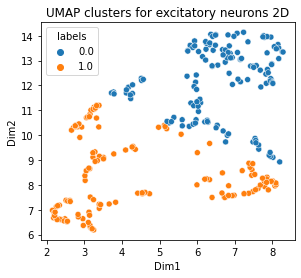

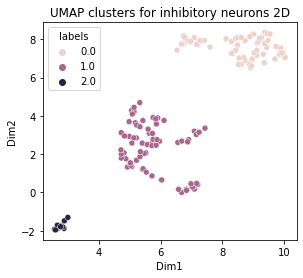

In [35]:
# data_exc = data_acsf_exc_all_conds
# data_inh = data_acsf_inh_all_conds

# df_exc = pd.DataFrame(data_exc,columns=features)
# df_inh = pd.DataFrame(data_inh,columns=features)
ind_feat = [0,3,4,6,18,20]


labels_exc, labels_inh = plot_UMAP_clusters(df_inh_old[df_inh_old.columns[ind_feat]],
                                       df_exc_old[df_exc_old.columns[ind_feat]],
                                       15,
                                       0.0,
                                       condition_inh=np.repeat(['acsf'],len(df_inh_old[df_inh_old.columns[ind_feat]])),
                                       condition_exc=np.repeat(['acsf'],len(df_exc_old[df_exc_old.columns[ind_feat]])),
                                       k_inh=3,
                                       k_exc=2,
                                       random_state=42)

# labels_exc, labels_inh = plot_UMAP_clusters(df_inh,
#                                        df_exc,
#                                        15,
#                                        0.0,
#                                        condition_inh=np.repeat(['acsf'],len(df_inh)),
#                                        condition_exc=np.repeat(['acsf'],len(df_exc)),
#                                        k_inh=3,
#                                        k_exc=2)

In [77]:
df_inh_old['labels'] = labels_inh
df_exc_old['labels'] = labels_exc
list_cond = []
for i in np.unique(df_inh_old['labels']):
    exp = df_inh_old[df_inh_old['labels']==i]['exp_name']


    for exp_ in np.unique(exp):
        try:
            data = loadmatInPy("D:/Analyzed/"+exp_+'_analyzed.mat')
        except:
            data = loadmatInPy("D:/Analyzed/"+'Copy of '+exp_+'_analyzed.mat')
        for inst in data:
            cond = inst['input_generation_settings']['condition'].lower() 
            if cond !='acsf':
                list_cond.append(cond)
                 

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Analyzed/Copy of xuan_24-6-19_E1_analyzed.mat'

In [76]:
# try:
#     data = loadmatInPy("D:/Analyzed/"+'NC_170623_aCSF_D1ago_E4'+'_analyzed.mat')
# except:
data = loadmatInPy("D:/Analyzed/"+'Copy of '+'NC_170623_aCSF_D1ago_E4'+'_analyzed.mat')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Analyzed/Copy of NC_170623_aCSF_D1ago_E4_analyzed.mat'

In [68]:
for i in data:
    print(i['input_generation_settings']['condition'])

aCSF
aCSF
aCSF
aCSF
